### Forecast the CocaCola Sales data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting

# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
coca=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# 3.Data Understanding

In [3]:
coca.shape

(42, 2)

In [4]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
coca.dtypes

Quarter     object
Sales      float64
dtype: object

In [6]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


## visualization

<AxesSubplot:>

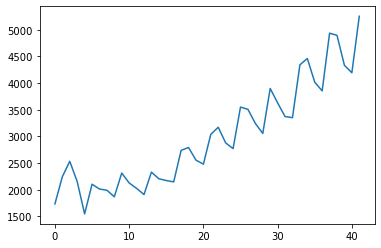

In [8]:
coca.Sales.plot()

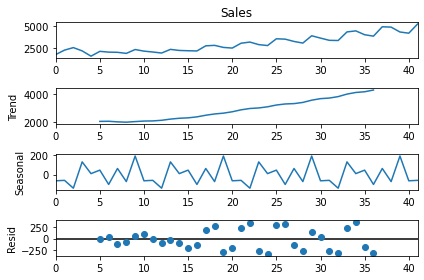

In [9]:
seasonal_ts_add= sm.tsa.seasonal_decompose(coca['Sales'],freq=10)
seasonal_ts_add.plot()
plt.show()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

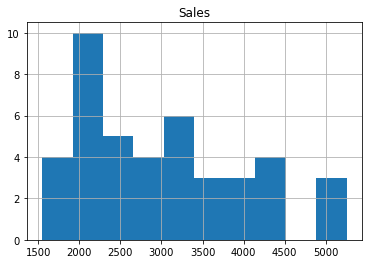

In [10]:
coca.hist()

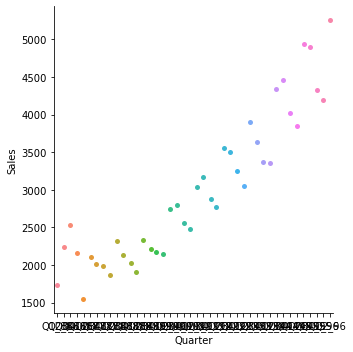

In [11]:
sns.catplot( x='Quarter',y='Sales',data=coca)

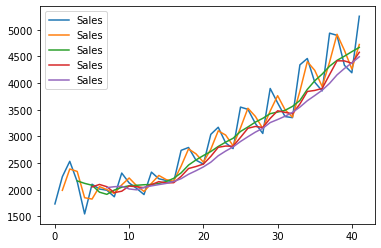

In [12]:
coca.Sales.plot()
for i in range(2,10,2):
    coca["Sales"].rolling(i).mean().plot()
    plt.legend(loc=2)

## Preprocessing

In [17]:
quarter =['Q1','Q2','Q3','Q4']
p = coca["Quarter"][0]
p[0:2]
coca['quarter']= 0

for i in range(42):
    p = coca["Quarter"][i]
    coca['quarter'][i]= p[0:2]

coca.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [18]:
quarter_dummies = pd.DataFrame(pd.get_dummies(coca['quarter']))
coca1 = pd.concat([coca,quarter_dummies],axis = 1)
coca1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [19]:
coca1["t"] = np.arange(1,43)
coca1["t_squared"] = coca1["t"]*coca1["t"]
coca1["log_Sales"] = np.log(coca1["Sales"])
coca1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [20]:
coca1.shape

(42, 10)

## Splitting the Data

In [21]:
Train= coca1.head(32)
Test= coca1.tail(10)

In [22]:
Train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [23]:
Test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


## Model Build And RMSE Value

### Linear Model

In [24]:
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767121

### Exponential Model

In [25]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432076657

### Quadratic Model

In [26]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.7357355407437

### Additive Seasonality

In [27]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461858358

### Additive Seasonality Quadratic

In [28]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128639

### Multiplicative Seasonality

In [29]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836118

### Multiplicative Additive Seasonality

In [30]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.8678182692097

## Compare the Results

In [31]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


## Predicting new Data

In [32]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [33]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96      Q3   0   0   1   0  1          1
1   Q4_96      Q4   0   0   0   1  2          4
2   Q1_97      Q1   1   0   0   0  3          9
3   Q2_97      Q2   0   1   0   0  4         16


In [34]:
# Forecasting using Additive Seasonality Quadratic Model

model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=coca1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["forecasted_sales"] = pd.Series(pred_new)
# Final Prediction for next 4 Quarters

Final_predict = forecast1.loc[:, ['Quarter', 'forecasted_sales']] 
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547


# THE END!